In [3]:
#Libraris to import
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

In [4]:
#Load the data

data = pd.read_csv("weight-height.csv")

In [5]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
data.Gender.value_counts()

Female    5000
Male      5000
Name: Gender, dtype: int64

In [7]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [8]:
#Smote
#RandomSampler
#Imblearn

In [9]:
#Data Statistics
data.groupby("Gender").agg({'Height': ['mean', 'min', 'max']})

Height                      
             mean        min        max
Gender                                 
Female  63.708774  54.263133  73.389586
Male    69.026346  58.406905  78.998742

In [10]:
data.groupby("Gender").agg({'Weight': ['mean', 'min', 'max']})

Weight                        
              mean         min         max
Gender                                    
Female  135.860093   64.700127  202.237214
Male    187.020621  112.902939  269.989699

In [11]:
data["Gender"] = np.where(data["Gender"]=="Male",0,1)

In [12]:
X = data[["Height","Weight"]]
y = data["Gender"]

In [13]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3, random_state = 0)

In [14]:
model = LogisticRegression()

In [15]:
model.fit(train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
model.coef_

array([[ 0.49548897, -0.20348725]])

In [46]:
model.intercept_

array([0.01041207])

In [47]:
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)

In [53]:
def metric_res(acctual, pred):
    print("confusion_matrix ", confusion_matrix(acctual, pred))
    print("accuracy_score ", accuracy_score(acctual, pred))
    print("recall_score", recall_score(acctual, pred))
    print("precision_score ", precision_score(acctual, pred))
    print("f1_score", f1_score(acctual, pred))
    print("roc_auc_score", roc_auc_score(acctual, pred))
    print("classification report \n", classification_report(acctual, pred))


In [54]:
metric_res(train_y,train_pred)

confusion_matrix  [[3215  274]
 [ 291 3220]]
accuracy_score  0.9192857142857143
recall_score 0.9171176303047565
precision_score  0.9215798511734402
f1_score 0.9193433261955746
roc_auc_score 0.919292549746818
classification report 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      3489
           1       0.92      0.92      0.92      3511

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000



In [55]:
metric_res(test_y,test_pred)

confusion_matrix  [[1371  140]
 [ 104 1385]]
accuracy_score  0.9186666666666666
recall_score 0.9301544660846206
precision_score  0.9081967213114754
f1_score 0.9190444591904446
roc_auc_score 0.9187502972382071
classification report 
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      1511
           1       0.91      0.93      0.92      1489

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



In [56]:
import sklearn
sklearn.__version__

'0.23.2'

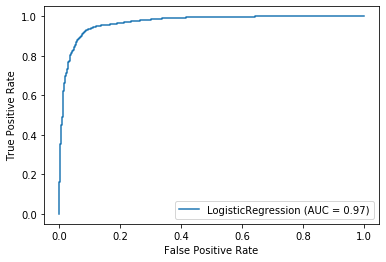

In [58]:
plot_roc_curve(model, test_X, test_y)

In [71]:
X = data[["Height"]]
y = data["Gender"]

In [72]:
model.fit(X,y)

LogisticRegression()

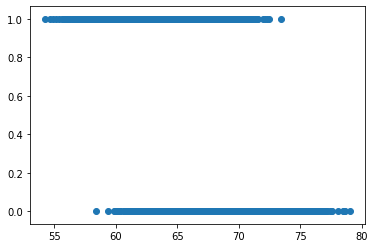

In [73]:
plt.scatter(X,y)

In [75]:
model.predict_proba(X)[:,1]

array([0.00588925, 0.15837284, 0.00492571, ..., 0.84352759, 0.13673511,
       0.95249272])

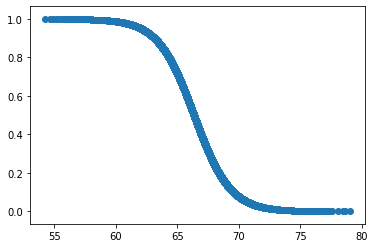

In [76]:
plt.scatter(X, model.predict_proba(X)[:,1])

In [77]:
model.predict_proba(X)

array([[0.99411075, 0.00588925],
       [0.84162716, 0.15837284],
       [0.99507429, 0.00492571],
       ...,
       [0.15647241, 0.84352759],
       [0.86326489, 0.13673511],
       [0.04750728, 0.95249272]])